In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 9s 4us/step


In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [7]:
min(train_labels)

0

In [6]:
max(train_labels)

45

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = {v:k for k, v in word_index.items()}
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 2s 4us/step


In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
def vectorize_sequences(sequences, dimension = 10000):
    vec = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        vec[i, sequence] = 1
    return vec

In [12]:
x_train, y_train = vectorize_sequences(train_data), vectorize_sequences(train_labels, 46)
x_test, y_test = vectorize_sequences(test_data), vectorize_sequences(test_labels, 46)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
x_val, y_val = x_train[:1000], y_train[:1000]
partial_x_train, partial_y_train = x_train[1000:], y_train[1000:]

In [42]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
#model.add(Dense(4, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, batch_size=512, 
                    epochs =20, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 125us/step - loss: 2.6768 - acc: 0.5689 - val_loss: 1.9216 - val_acc: 0.6600
Epoch 2/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.5360 - acc: 0.7251 - val_loss: 1.3913 - val_acc: 0.7320
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.0927 - acc: 0.7910 - val_loss: 1.1488 - val_acc: 0.7700
Epoch 4/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.8411 - acc: 0.8360 - val_loss: 1.0152 - val_acc: 0.7990
Epoch 5/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.6695 - acc: 0.8726 - val_loss: 0.9427 - val_acc: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.5492 - acc: 0.8946 - val_loss: 0.8904 - val_acc: 0.8200
Epoch 7/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.4536 - acc: 0.9094 - val_loss: 0.8627 - val_acc: 0.8230
Epoch 

In [43]:
history_dict = history.history

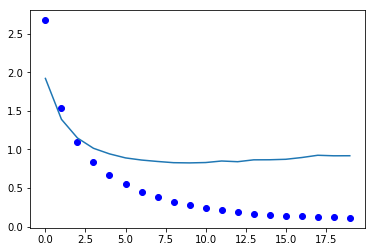

In [44]:
plt.plot(history_dict['loss'], 'bo', label='train')
plt.plot(history_dict['val_loss'], label='validatio')

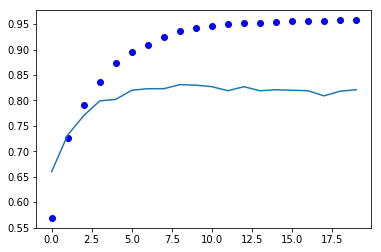

In [45]:
plt.clf()
plt.plot(history_dict['acc'], 'bo', label='train')
plt.plot(history_dict['val_acc'], label='validatio')

In [25]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=512, epochs =9)
result = model.evaluate(x_test, y_test)

Epoch 1/9
8982/8982 [==============================] - 1s 100us/step - loss: 2.4437 - acc: 0.5332
Epoch 2/9
8982/8982 [==============================] - 1s 81us/step - loss: 1.3241 - acc: 0.7161
Epoch 3/9
8982/8982 [==============================] - 1s 76us/step - loss: 0.9744 - acc: 0.7869
Epoch 4/9
8982/8982 [==============================] - 1s 72us/step - loss: 0.7565 - acc: 0.8390
Epoch 5/9
8982/8982 [==============================] - 1s 73us/step - loss: 0.5963 - acc: 0.8764
Epoch 6/9
8982/8982 [==============================] - 1s 72us/step - loss: 0.4751 - acc: 0.9009
Epoch 7/9
8982/8982 [==============================] - 1s 71us/step - loss: 0.3831 - acc: 0.9175
Epoch 8/9
8982/8982 [==============================] - 1s 73us/step - loss: 0.3076 - acc: 0.9348
Epoch 9/9
2246/2246 [==============================] - 0s 105us/step


In [26]:
result

[0.9800313458523364, 0.7902938557966204]

In [28]:
# Baseline performance
import copy
test_label_copy = copy.copy(test_labels)
np.random.shuffle(test_label_copy)
print(np.sum(test_label_copy==test_labels)/len(test_labels))

0.19412288512911843


## Different encoding of targets

In [29]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, np.array(train_labels), batch_size=512, epochs =9)
result = model.evaluate(x_test, np.array(test_labels))

Epoch 1/9
8982/8982 [==============================] - 1s 92us/step - loss: 2.6023 - acc: 0.5478
Epoch 2/9
8982/8982 [==============================] - 1s 72us/step - loss: 1.3369 - acc: 0.7311
Epoch 3/9
8982/8982 [==============================] - 1s 70us/step - loss: 0.9886 - acc: 0.7877
Epoch 4/9
8982/8982 [==============================] - 1s 71us/step - loss: 0.7748 - acc: 0.8396
Epoch 5/9
8982/8982 [==============================] - 1s 72us/step - loss: 0.6169 - acc: 0.8739
Epoch 6/9
8982/8982 [==============================] - 1s 71us/step - loss: 0.4909 - acc: 0.8998
Epoch 7/9
8982/8982 [==============================] - 1s 71us/step - loss: 0.3972 - acc: 0.9196
Epoch 8/9
8982/8982 [==============================] - 1s 72us/step - loss: 0.3223 - acc: 0.9316
Epoch 9/9
2246/2246 [==============================] - 0s 86us/step


In [30]:
result

[0.9400118463079736, 0.8036509349955476]